In [1]:
# Importing required libraries
from music21 import converter, instrument, note, chord, stream
import glob
import pickle
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# To load a music file
music_path="midi_songs/"
midi_file=converter.parse(music_path+"EyesOnMePiano.mid")
type(midi_file)

music21.stream.Score

In [3]:
# To listen to a music file
midi_file.show("midi")

In [4]:
# To see the song in written format
midi_file.show("text")

{0.0} <music21.stream.Part 0x18e728cc040>
    {0.0} <music21.instrument.Piano 'Staff: Piano'>
    {0.0} <music21.tempo.MetronomeMark Quarter=95.0>
    {0.0} <music21.key.Key of D major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x18e1ad35670>
        {0.0} <music21.note.Note A>
        {0.25} <music21.note.Rest rest>
        {0.6667} <music21.note.Note G>
        {1.1667} <music21.note.Rest rest>
        {1.5} <music21.note.Note D>
        {1.8333} <music21.note.Rest rest>
        {2.0} <music21.note.Note A>
        {2.3333} <music21.note.Rest rest>
        {2.5} <music21.note.Note G>
        {2.8333} <music21.note.Rest rest>
        {3.0} <music21.note.Note D>
        {3.3333} <music21.note.Rest rest>
        {3.5} <music21.note.Note A>
        {3.8333} <music21.note.Rest rest>
        {4.0} <music21.note.Note A>
        {5.75} <music21.note.Rest rest>
        {6.0} <music21.note.Note A>
        {7.75} <music21.note.Rest rest>
        {8.0} <music21.n

In [5]:
# Flatten the list of lists above into a single list
elements_to_parse=midi_file.flat.notes
print(len(elements_to_parse))

1425


In [6]:
# Iterating over these elements
for e in elements_to_parse:
    print(e, e.offset)

<music21.note.Note A> 0.0
<music21.note.Note A> 0.0
<music21.note.Note A> 0.0
<music21.note.Note A> 0.25
<music21.note.Note G> 2/3
<music21.note.Note G> 2/3
<music21.note.Note F#> 1.0
<music21.note.Note F#> 1.25
<music21.note.Note D> 1.5
<music21.note.Note D> 1.5
<music21.note.Note C#> 1.75
<music21.note.Note C#> 1.75
<music21.note.Note A> 2.0
<music21.note.Note A> 2.25
<music21.note.Note G> 2.5
<music21.note.Note G> 2.5
<music21.note.Note F#> 2.75
<music21.note.Note F#> 2.75
<music21.note.Note D> 3.0
<music21.note.Note D> 3.25
<music21.note.Note A> 3.5
<music21.note.Note A> 3.5
<music21.note.Note D> 3.75
<music21.note.Note D> 3.75
<music21.note.Note A> 4.0
<music21.note.Note D> 4.0
<music21.note.Note B> 4.0
<music21.note.Note G> 4.0
<music21.note.Note A> 4.25
<music21.note.Note D> 4.25
<music21.note.Note B> 4.25
<music21.note.Note G> 4.25
<music21.note.Note E> 5.0
<music21.note.Note C#> 5.0
<music21.note.Note E> 5.25
<music21.note.Note C#> 5.25
<music21.note.Note F#> 17/3
<music21.not

<music21.note.Note B> 404/3
<music21.note.Note B> 404/3
<music21.chord.Chord F#4 C#5> 135.0
<music21.note.Note F#> 135.0
<music21.chord.Chord A3 D4> 135.0
<music21.chord.Chord F#4 C#5> 135.25
<music21.note.Note F#> 135.25
<music21.chord.Chord A3 D4> 135.25
<music21.note.Note A> 407/3
<music21.note.Note A> 407/3
<music21.chord.Chord B4 D5> 136.0
<music21.note.Note B> 136.0
<music21.note.Note G> 136.0
<music21.chord.Chord B4 D5> 136.25
<music21.note.Note B> 136.25
<music21.note.Note G> 136.25
<music21.note.Note D> 410/3
<music21.note.Note D> 410/3
<music21.note.Note A> 137.0
<music21.note.Note A> 137.25
<music21.note.Note B> 413/3
<music21.note.Note G> 413/3
<music21.note.Note B> 413/3
<music21.note.Note G> 413/3
<music21.note.Note A> 138.0
<music21.note.Note B> 138.0
<music21.note.Note A> 138.25
<music21.note.Note B> 138.25
<music21.note.Note G> 416/3
<music21.note.Note G> 416/3
<music21.chord.Chord F#4 B4> 139.0
<music21.note.Note D> 139.0
<music21.note.Note G#> 139.0
<music21.chord.Ch

In [7]:
print(elements_to_parse[1])
print(elements_to_parse[1].pitch)

<music21.note.Note A>
A6


In [8]:
print(elements_to_parse[69])
print(elements_to_parse[69].normalOrder)

<music21.chord.Chord A3 D4>
[9, 2]


In [9]:
notes=[]
for file in glob.glob(music_path+"*.mid"):
    midi_file=converter.parse(file)
    print("Parsing %s"%file)
    elements_to_parse=midi_file.flat.notes
    for e in elements_to_parse:
        if isinstance(e, note.Note): # Current element is a note
            notes.append(str(e.pitch))
        elif isinstance(e, chord.Chord): # Current element is a chord
            notes.append("+".join(str(n) for n in e.normalOrder))

Parsing midi_songs\0fithos.mid
Parsing midi_songs\8.mid
Parsing midi_songs\ahead_on_our_way_piano.mid
Parsing midi_songs\AT.mid
Parsing midi_songs\balamb.mid
Parsing midi_songs\bcm.mid
Parsing midi_songs\BlueStone_LastDungeon.mid
Parsing midi_songs\braska.mid
Parsing midi_songs\caitsith.mid
Parsing midi_songs\Cids.mid
Parsing midi_songs\cosmo.mid
Parsing midi_songs\costadsol.mid
Parsing midi_songs\dayafter.mid
Parsing midi_songs\decisive.mid
Parsing midi_songs\dontbeafraid.mid
Parsing midi_songs\DOS.mid
Parsing midi_songs\electric_de_chocobo.mid
Parsing midi_songs\Eternal_Harvest.mid
Parsing midi_songs\EyesOnMePiano.mid
Parsing midi_songs\ff11_awakening_piano.mid
Parsing midi_songs\ff1battp.mid
Parsing midi_songs\FF3_Battle_(Piano).mid
Parsing midi_songs\FF3_Third_Phase_Final_(Piano).mid
Parsing midi_songs\ff4-airship.mid
Parsing midi_songs\Ff4-BattleLust.mid
Parsing midi_songs\ff4-fight1.mid
Parsing midi_songs\ff4-town.mid
Parsing midi_songs\FF4.mid
Parsing midi_songs\ff4pclov.mid
Par

In [10]:
len(notes)

60866

In [11]:
# Saving notes list locally
with open("notes", "wb") as filepath:
    pickle.dump(notes, filepath)

In [12]:
# Loading notes from drive
notes=None
with open("notes", "rb") as f:
    notes=pickle.load(f)

In [13]:
notes

['4+9',
 'E2',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '11+4',
 '4+9',
 '11+4',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '0+4',
 'E2',
 '4+9',
 '0+4',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '9+2',
 '4+9',
 '9+2',
 '9+2',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 'E2',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 '4+9',
 'E5',
 'F5',
 'G#5',
 'A5',
 '4+9',
 '4+9',
 '5+11',
 '4+9',
 '5+11',
 '4+9',
 '4+9',
 '4+9',
 'E5',
 'F5',
 'G#5',
 'A5',
 '4+9',
 '4+9',
 '9+0',
 'E2',
 '4+9',
 '9+0',
 '4+9',
 '4+9',
 '4+9',
 'E5',
 'F5',
 'G#5',
 'A5',
 '4+9',
 '4+9',
 '11+2',
 '4+9',
 '11+2',
 '11+2',
 '4+9',
 '4+9',
 '4+9',
 'E5',
 'F5',
 'G#5',
 'A5',
 '4+9',
 '4+9',
 '3+7+11',
 'E-2',
 '3+7+11',
 'B2',
 'G2',
 '1+5+9',
 'F#2',
 '1+5+9',
 '3+7+11',
 'E-2',
 '3+7+11',
 'G2',
 'B2',
 'E-3',
 '1+5+9',
 'G#2',
 '1+5+9',
 '1+5+9',
 'F3',
 'F2',
 'F2',
 'F2',
 'F2',
 'F2',
 '4+9',
 'E5',
 '4+9',
 'C5',
 '4+9',
 'A5',
 '4+9',
 '5+9',
 'F5',
 '5+9',
 'C5',
 '5+9',
 'A5',
 '5+9',
 '4+9',
 'E

In [14]:
# Number of unique elements(vocab size)
n_vocab=len(set(notes))
print(n_vocab)

359


In [15]:
sequence_length=100
pitch_names=sorted(set(notes))
pitch_names

['0',
 '0+1',
 '0+1+5',
 '0+1+6',
 '0+2',
 '0+2+3+7',
 '0+2+4+7',
 '0+2+5',
 '0+2+6',
 '0+2+7',
 '0+3',
 '0+3+5',
 '0+3+5+8',
 '0+3+6',
 '0+3+6+8',
 '0+3+6+9',
 '0+3+7',
 '0+4',
 '0+4+5',
 '0+4+6',
 '0+4+7',
 '0+5',
 '0+6',
 '1',
 '1+2',
 '1+2+4+6+8+10',
 '1+2+6',
 '1+3',
 '1+3+5',
 '1+3+5+8',
 '1+3+6',
 '1+3+7',
 '1+3+8',
 '1+4',
 '1+4+6',
 '1+4+6+9',
 '1+4+7',
 '1+4+7+10',
 '1+4+7+9',
 '1+4+8',
 '1+5',
 '1+5+8',
 '1+5+9',
 '1+6',
 '1+7',
 '10',
 '10+0',
 '10+0+2',
 '10+0+2+5',
 '10+0+3',
 '10+0+4',
 '10+0+5',
 '10+1',
 '10+1+3',
 '10+1+3+5+6',
 '10+1+3+6',
 '10+1+4',
 '10+1+4+6',
 '10+1+5',
 '10+11',
 '10+11+3',
 '10+11+3+5',
 '10+2',
 '10+2+3',
 '10+2+4',
 '10+2+5',
 '10+3',
 '11',
 '11+0',
 '11+0+4',
 '11+0+4+6',
 '11+0+4+7',
 '11+0+5',
 '11+1',
 '11+1+4',
 '11+1+4+5',
 '11+1+5',
 '11+1+6',
 '11+2',
 '11+2+4',
 '11+2+4+6',
 '11+2+4+7',
 '11+2+5',
 '11+2+5+7',
 '11+2+6',
 '11+3',
 '11+3+5',
 '11+3+6',
 '11+4',
 '11+4+5',
 '2',
 '2+3',
 '2+3+7',
 '2+3+7+10',
 '2+3+7+9',
 '2+4',
 '2+4

In [16]:
# Mapping elements to indices
elem_to_idx={elem: num for num, elem in enumerate(pitch_names)}
elem_to_idx

{'0': 0,
 '0+1': 1,
 '0+1+5': 2,
 '0+1+6': 3,
 '0+2': 4,
 '0+2+3+7': 5,
 '0+2+4+7': 6,
 '0+2+5': 7,
 '0+2+6': 8,
 '0+2+7': 9,
 '0+3': 10,
 '0+3+5': 11,
 '0+3+5+8': 12,
 '0+3+6': 13,
 '0+3+6+8': 14,
 '0+3+6+9': 15,
 '0+3+7': 16,
 '0+4': 17,
 '0+4+5': 18,
 '0+4+6': 19,
 '0+4+7': 20,
 '0+5': 21,
 '0+6': 22,
 '1': 23,
 '1+2': 24,
 '1+2+4+6+8+10': 25,
 '1+2+6': 26,
 '1+3': 27,
 '1+3+5': 28,
 '1+3+5+8': 29,
 '1+3+6': 30,
 '1+3+7': 31,
 '1+3+8': 32,
 '1+4': 33,
 '1+4+6': 34,
 '1+4+6+9': 35,
 '1+4+7': 36,
 '1+4+7+10': 37,
 '1+4+7+9': 38,
 '1+4+8': 39,
 '1+5': 40,
 '1+5+8': 41,
 '1+5+9': 42,
 '1+6': 43,
 '1+7': 44,
 '10': 45,
 '10+0': 46,
 '10+0+2': 47,
 '10+0+2+5': 48,
 '10+0+3': 49,
 '10+0+4': 50,
 '10+0+5': 51,
 '10+1': 52,
 '10+1+3': 53,
 '10+1+3+5+6': 54,
 '10+1+3+6': 55,
 '10+1+4': 56,
 '10+1+4+6': 57,
 '10+1+5': 58,
 '10+11': 59,
 '10+11+3': 60,
 '10+11+3+5': 61,
 '10+2': 62,
 '10+2+3': 63,
 '10+2+4': 64,
 '10+2+5': 65,
 '10+3': 66,
 '11': 67,
 '11+0': 68,
 '11+0+4': 69,
 '11+0+4+6': 70,

In [17]:
X, Y=[], []
for i in range((len(notes)-sequence_length)):
    seq_in=notes[i: i+sequence_length]
    seq_out=notes[i+sequence_length]
    X.append([elem_to_idx[n] for n in seq_in])
    Y.append(elem_to_idx[seq_out])
X, Y =np.array(X), np.array(Y)
print(X.shape, Y.shape)

(60766, 100) (60766,)


In [18]:
# Reshaping X from matrix to a tensor
X=np.reshape(X, newshape=(*X.shape, 1))
X.shape

(60766, 100, 1)

In [19]:
# Normalization
X=X/float(n_vocab)

In [20]:
# Conerting Y values to 1hot encodings
Y=np_utils.to_categorical(Y)
Y.shape

(60766, 359)

In [21]:
# To remove error due to tensorflow-gpu backend
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [22]:
# Model creation
model=Sequential()
model.add(LSTM(units=512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(512, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(512))
model.add(Dropout(0.3))
model.add(Dense(n_vocab, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 512)          1052672   
_________________________________________________________________
dropout (Dropout)            (None, 100, 512)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 512)          2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 512)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 359)               1

In [23]:
# Callbacks
checkpoint=ModelCheckpoint("model/model.hdf5", monitor="loss", save_best_only=True, mode="min")

In [24]:
model_hist=model.fit(X, Y, epochs=50, batch_size=64, callbacks=[checkpoint])

Epoch 1/50
950/950 [==============================] - 133s 130ms/step - loss: 4.8129
Epoch 2/50
950/950 [==============================] - 123s 130ms/step - loss: 4.7316
Epoch 3/50
950/950 [==============================] - 123s 130ms/step - loss: 4.7195
Epoch 4/50
950/950 [==============================] - 123s 129ms/step - loss: 4.7132
Epoch 5/50
950/950 [==============================] - 123s 129ms/step - loss: 4.5863
Epoch 6/50
950/950 [==============================] - 123s 129ms/step - loss: 4.5245
Epoch 7/50
950/950 [==============================] - 123s 129ms/step - loss: 4.4898
Epoch 8/50
950/950 [==============================] - 123s 129ms/step - loss: 4.4627
Epoch 9/50
950/950 [==============================] - 123s 130ms/step - loss: 4.4013
Epoch 10/50
950/950 [==============================] - 123s 129ms/step - loss: 4.3346
Epoch 11/50
950/950 [==============================] - 123s 129ms/step - loss: 4.2742
Epoch 12/50
950/950 [==============================] - 122s 128

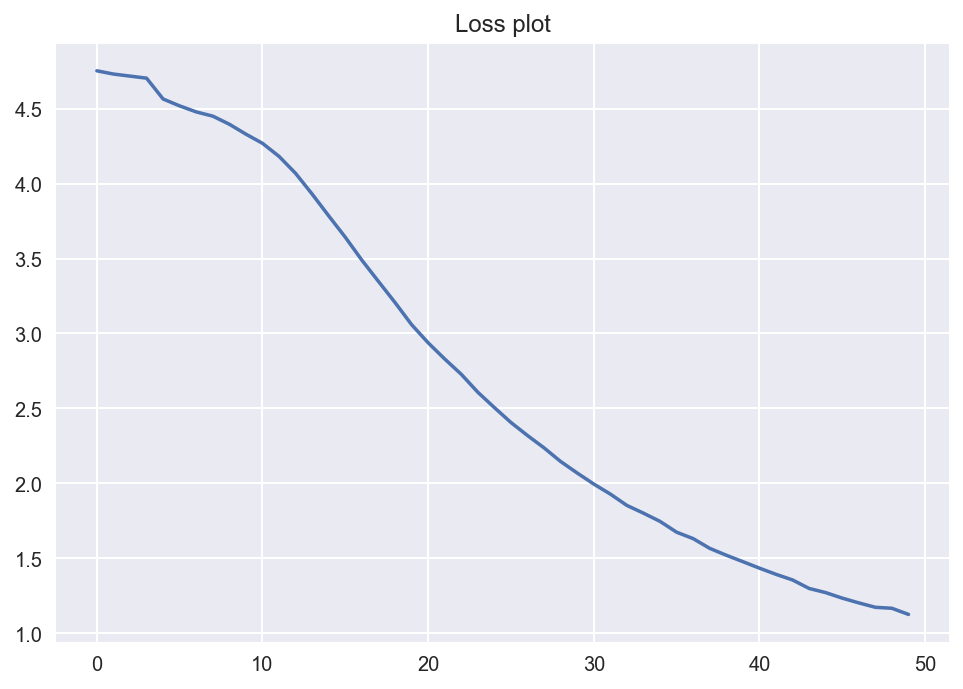

In [26]:
# Loss plot
plt.style.use("seaborn")
plt.title("Loss plot")
plt.plot(model_hist.history['loss'])
plt.show()

In [28]:
# Loading the model
model=load_model("model/model.hdf5")

In [29]:
# Prediction
possible_inputs=[]
for i in range(len(notes)-sequence_length):
    seq_in=notes[i: i+sequence_length]
    possible_inputs.append([elem_to_idx[n] for n in seq_in])
# Selecting a random index as starting sequence
start=np.random.randint(len(possible_inputs)-1)
idx_to_elem={value: key for key, value in elem_to_idx.items()} # Mapping index to element
pattern=possible_inputs[start] # Inital pattern/sequence
final_prediction=[]
output_len=200
for note_index in range(output_len):
    X_test=np.reshape(pattern, (1, len(pattern), 1))
    X_test=X_test/np.float(n_vocab)
    pred_probabs=model.predict(X_test)
    pred_idx=np.argmax(pred_probabs)
    prediction=idx_to_elem[pred_idx]
    final_prediction.append(prediction)
    pattern.append(pred_idx) # Adding the prediction as the new last element
    pattern=pattern[1:] # Removing the first element
print(final_prediction)

['C3', '0+4', 'B2', '2+5', 'E3', 'D3', '0+4+7', '0', 'C3', 'C2', 'G4', '11+2', '7', '2+5', 'G3', 'G2', '0+4', 'E5', 'C2', '2+7', 'C3', 'G2', '0+4', 'G2', '2+7', 'B2', 'G2', 'E5', 'C6', '0', '11+2', 'C3', 'C2', 'C5', 'E5', '7', '2+5', 'G3', 'G2', '4+7', 'C2', 'C2', '2+5', 'G2', 'C2', '0+4', 'C2', '11+2', 'C3', 'B2', '0+4', '9', 'A3', 'A2', 'G#4', 'B4', 'E2', '11+2', 'E3', 'E2', '9+0', 'C5', '9', '11+2', 'A2', '0+4', 'A2', '4+9', 'E2', 'E2', 'C5', 'A5', '9', '8+11', 'A3', 'A2', 'A4', 'C5', 'E2', '11+2', 'E3', 'E2', '0+4', 'A2', 'A2', '11+2', 'E2', 'C3', '0+4', 'B2', '2+5', 'E3', 'D3', '0+4+7', '0', 'C3', 'C2', 'G4', '11+2', '7', '2+5', 'G3', 'G2', '0+4', 'E5', 'C2', '2+7', 'C3', 'G2', '0+4', 'G2', '2+7', 'B2', 'G2', 'E5', 'C6', '0', '11+2', 'C3', 'C2', 'C5', 'E5', '7', '2+5', 'G3', 'G2', '4+7', 'C2', 'C2', '2+5', 'G2', 'C2', '0+4', 'C2', '11+2', 'C3', 'B2', '0+4', '9', 'A3', 'A2', 'G#4', 'B4', 'E2', '11+2', 'E3', 'E2', '9+0', 'C5', '9', '11+2', 'A2', '0+4', 'A2', '4+9', 'E2', 'E2', 'C5',

In [30]:
# Creating a midi file with the prediction
offset=0
output_notes=[]
for elem in final_prediction:
    if '+' in elem or elem.isdigit(): # Chord
        notes_in_chord=elem.split('+')
        temp_notes=[]
        for current_note in notes_in_chord:
            new_note=note.Note(int(current_note)) # Making notes out of respective integers
            new_note.storedInstrument=instrument.Piano()
            temp_notes.append(new_note)
        new_chord=chord.Chord(temp_notes) # Making a chord using notes
        new_chord.offset=offset
        output_notes.append(new_chord)
    else: # Note
        new_note=note.Note(elem)
        new_note.storedInstrument=instrument.Piano()
        new_note.offset=offset
        output_notes.append(new_note)
    offset+=0.5
midi_stream=stream.Stream(output_notes) # Creating stream object out of list of notes and chords

In [31]:
# Created music in text format
midi_stream.show('text')

{0.0} <music21.note.Note C>
{0.5} <music21.chord.Chord C E>
{1.0} <music21.note.Note B>
{1.5} <music21.chord.Chord D F>
{2.0} <music21.note.Note E>
{2.5} <music21.note.Note D>
{3.0} <music21.chord.Chord C E G>
{3.5} <music21.chord.Chord C>
{4.0} <music21.note.Note C>
{4.5} <music21.note.Note C>
{5.0} <music21.note.Note G>
{5.5} <music21.chord.Chord B D>
{6.0} <music21.chord.Chord G>
{6.5} <music21.chord.Chord D F>
{7.0} <music21.note.Note G>
{7.5} <music21.note.Note G>
{8.0} <music21.chord.Chord C E>
{8.5} <music21.note.Note E>
{9.0} <music21.note.Note C>
{9.5} <music21.chord.Chord D G>
{10.0} <music21.note.Note C>
{10.5} <music21.note.Note G>
{11.0} <music21.chord.Chord C E>
{11.5} <music21.note.Note G>
{12.0} <music21.chord.Chord D G>
{12.5} <music21.note.Note B>
{13.0} <music21.note.Note G>
{13.5} <music21.note.Note E>
{14.0} <music21.note.Note C>
{14.5} <music21.chord.Chord C>
{15.0} <music21.chord.Chord B D>
{15.5} <music21.note.Note C>
{16.0} <music21.note.Note C>
{16.5} <music21

In [32]:
# Listening to the created music
midi_stream.show('midi')

In [33]:
# Saving the music to external file
midi_stream.write('midi',  fp="generated_music/test_output.mid")

'generated_music/test_output.mid'